<a href="https://colab.research.google.com/github/Ramya570/Ramya570/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploadedd=files.upload()

Saving iris.csv to iris.csv


In [17]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = iris.target_names[y]


print(iris_df.isnull().sum())

print(iris_df.describe())


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


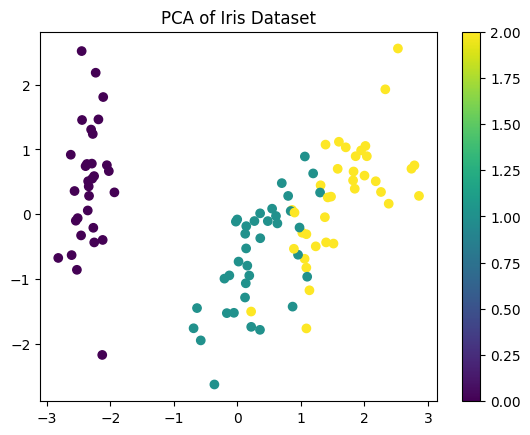

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.colorbar()
plt.title("PCA of Iris Dataset")
plt.show()


In [8]:
from sklearn.ensemble import RandomForestClassifier


In [18]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, None]
}


grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3)

grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)


Best parameters found: {'max_depth': 3, 'n_estimators': 150}


In [10]:

best_model = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                                    max_depth=grid_search.best_params_['max_depth'],
                                    random_state=42)


best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, n_estimators=150, random_state=42)

In [11]:

y_pred = best_model.predict(X_test)


In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Accuracy: 1.0000

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



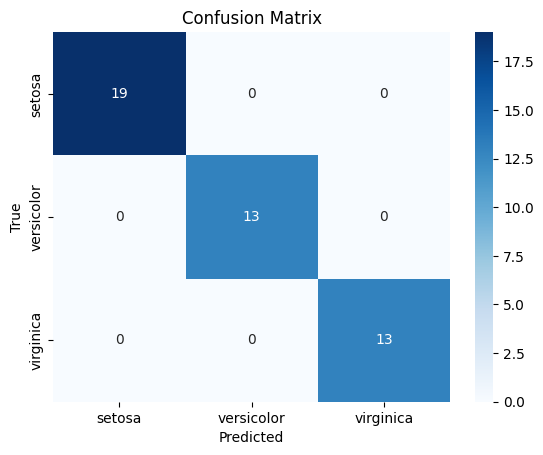

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [21]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")


Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean CV score: 0.9667


In [15]:

species_mapping = {
    0: 'Setosa',
    1: 'Versicolor',
    2: 'Virginica'
}


y_pred = best_model.predict(X_test)

y_pred_species = [species_mapping[pred] for pred in y_pred]

print("Predicted species for the test set:")
for i in range(len(y_pred_species)):
    print(f"Sample {i+1}: {y_pred_species[i]}")


Predicted species for the test set:
Sample 1: Versicolor
Sample 2: Setosa
Sample 3: Virginica
Sample 4: Versicolor
Sample 5: Versicolor
Sample 6: Setosa
Sample 7: Versicolor
Sample 8: Virginica
Sample 9: Versicolor
Sample 10: Versicolor
Sample 11: Virginica
Sample 12: Setosa
Sample 13: Setosa
Sample 14: Setosa
Sample 15: Setosa
Sample 16: Versicolor
Sample 17: Virginica
Sample 18: Versicolor
Sample 19: Versicolor
Sample 20: Virginica
Sample 21: Setosa
Sample 22: Virginica
Sample 23: Setosa
Sample 24: Virginica
Sample 25: Virginica
Sample 26: Virginica
Sample 27: Virginica
Sample 28: Virginica
Sample 29: Setosa
Sample 30: Setosa
Sample 31: Setosa
Sample 32: Setosa
Sample 33: Versicolor
Sample 34: Setosa
Sample 35: Setosa
Sample 36: Virginica
Sample 37: Versicolor
Sample 38: Setosa
Sample 39: Setosa
Sample 40: Setosa
Sample 41: Virginica
Sample 42: Versicolor
Sample 43: Versicolor
Sample 44: Setosa
Sample 45: Setosa


In [22]:

new_data = [[5.1, 3.5, 1.4, 0.2]]
new_data_scaled = scaler.transform(new_data)


prediction = best_model.predict(new_data_scaled)


predicted_species = species_mapping[prediction[0]]


print(f"The predicted species for the new flower is: {predicted_species}")


The predicted species for the new flower is: Setosa
